# Assumptions of Linear Regression 

    1.Linear relationship:Linear regression needs linear relationship between independent(x) and dependent variable(y).Linear Regression is v sensitive to outliers,it is v imp to chk outliers before performing regression analysis.
    2.Normality:LR requires all variables to be normally distributed.The error terms also should be normally distributed.
    3.Multicollinearity:There should be v little or no multicollinearity in the data.Multicollinearity happens when the independent variables are highly correlated(linearly corelated) with each other.
     -Methods to calculate/detect Multicollinearity
         a.Correlation Matrix(heat map)
         b.VIF(variance inflating factor)
         c.Tolerance
    4.Homoscedasticity:The error terms must have a constant variance wrto the regression line.This phenomena is known as homoscedasticity.The presence of non constant variance is referred to as heteroscedasticity.
    5.Auto correlation:There should be no correlation between the residual(error) terms.The absence of this phenomena is called as auto correlation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv('car-mpg_students.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
df.info()  # 1st thing to do when u get a dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 31.2+ KB


In [4]:
#there are no non null values,398 entries as well as 398 non null values

In [5]:
df.describe() # next step is descriptive statistics

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,103.241206,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,39.471217,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,23.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [6]:
df.skew()

C:\Users\Dell\AppData\Local\Temp/ipykernel_3172/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


mpg         0.457066
cyl         0.526922
disp        0.719645
hp          0.953296
wt          0.531063
acc         0.278777
yr          0.011535
origin      0.923776
car_type   -0.121280
dtype: float64

In [7]:
df.kurt()

C:\Users\Dell\AppData\Local\Temp/ipykernel_3172/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


mpg        -0.510781
cyl        -1.376662
disp       -0.746597
hp          0.682171
wt         -0.785529
acc         0.419497
yr         -1.181232
origin     -0.817597
car_type   -1.995343
dtype: float64

In [8]:
df['origin'].value_counts() #1.America,2.Europe,3.Asia

1    249
3     79
2     70
Name: origin, dtype: int64

In [9]:
df['origin']=df['origin'].replace({1:'America',2:'Europe',3:'Asia'})

In [10]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,America,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,America,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,America,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,America,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,America,0,ford torino


In [11]:
df['origin'].value_counts()

America    249
Asia        79
Europe      70
Name: origin, dtype: int64

##  Encoding origin column using one hot encoding

In [12]:
pd.get_dummies(df['origin'])

,America,Asia,Europe
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,0,1
395,1,0,0
396,1,0,0


In [13]:
df=pd.get_dummies(df,columns=['origin'],drop_first=True)

In [14]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,plymouth satellite,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,amc rebel sst,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,ford torino,0,0


##  Detecting outliers in the dataset

<AxesSubplot:>

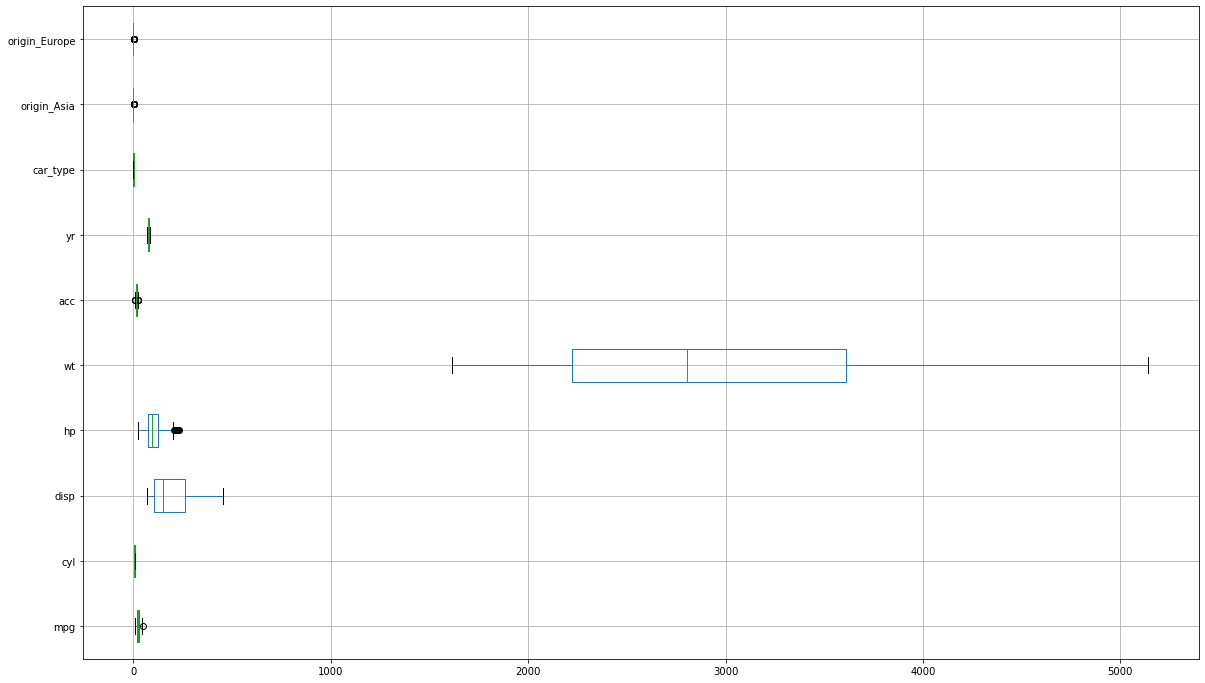

In [15]:
plt.figure(figsize=(20,12))
df.boxplot(vert=False)

In [16]:
def remove_outlier(col):
    sorted(col)
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    LW=q1-(1.5*IQR)
    UW=q3+(1.5*IQR)
    return LW,UW

In [17]:
for column in df.drop(['origin_Asia','origin_Europe','mpg','car_name'],axis=1).columns:  #for loop iterates all columns one by one
    LW,UW=remove_outlier(df[column])
    df[column]=np.where(df[column]>UW,UW,df[column])
    df[column]=np.where(df[column]<LW,LW,df[column])

<AxesSubplot:>

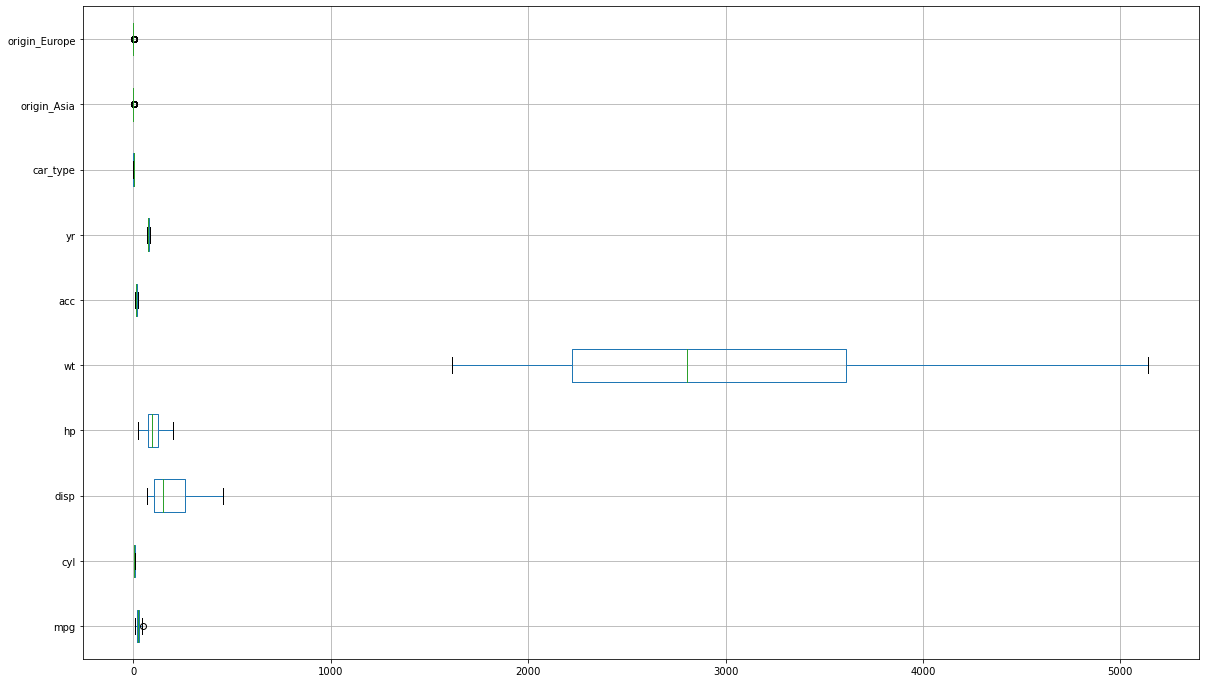

In [18]:
plt.figure(figsize=(20,12))
df.boxplot(vert=False)

##  Train,Test,Split

In [19]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name,origin_Asia,origin_Europe
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0.0,chevrolet chevelle malibu,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0.0,buick skylark 320,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0.0,plymouth satellite,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0.0,amc rebel sst,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0.0,ford torino,0,0


In [20]:
X=df.drop(['mpg','car_name'],axis=1)

In [21]:
X.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_Asia,origin_Europe
0,8.0,307.0,130.0,3504.0,12.0,70.0,0.0,0,0
1,8.0,350.0,165.0,3693.0,11.5,70.0,0.0,0,0
2,8.0,318.0,150.0,3436.0,11.0,70.0,0.0,0,0
3,8.0,304.0,150.0,3433.0,12.0,70.0,0.0,0,0
4,8.0,302.0,140.0,3449.0,10.5,70.0,0.0,0,0


In [22]:
y=df['mpg']

In [23]:
y.head() #series

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
df.shape

(398, 11)

In [26]:
X_train.shape

(278, 9)

In [27]:
X_test.shape

(120, 9)

In [28]:
y_train.shape

(278,)

In [29]:
y_test.shape

(120,)

##  Model Building
    1.Object creation
    2.Model fitting
    3.Model prediction
    4.Model evaluation

In [30]:
model=LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
model.predict(X_test)

array([19.42585194, 27.8660333 , 21.22381725, 28.2536898 , 22.52624727,
       16.86370688, 30.15476895, 35.05648736, 18.71704462, 11.17711787,
       30.61794852, 18.49884122, 19.95444606, 26.84164389, 36.93475033,
       23.55430097, 10.70432629, 18.59790519,  9.12736053, 33.50480919,
       26.16544084, 32.08588092, 19.25511299, 25.53081904, 26.10930543,
       30.42413832, 32.92590017, 33.35168541, 16.29313291, 30.29159422,
       24.97732632, 11.04952198, 21.55531399, 28.78155467, 25.40212318,
       14.03051298, 27.07124632,  9.60263366, 31.98726829, 24.66510222,
       24.65648861, 25.0123797 , 22.21533558, 33.9674628 , 23.69363205,
       20.22797277, 19.30123208, 12.48982259, 29.05610466, 17.10854475,
       24.73440059, 26.72223946, 17.97694772, 13.05755511, 28.81980896,
       25.19721899, 10.32456716, 14.01426801, 31.0260922 , 36.16552764,
       36.17916958, 36.18810318, 18.95093038, 25.32815633, 21.15808495,
       33.24941211, 24.33193704, 24.8139528 , 30.04182359, 13.55

In [33]:
y_pred=model.predict(X_test)

In [34]:
y_pred

array([19.42585194, 27.8660333 , 21.22381725, 28.2536898 , 22.52624727,
       16.86370688, 30.15476895, 35.05648736, 18.71704462, 11.17711787,
       30.61794852, 18.49884122, 19.95444606, 26.84164389, 36.93475033,
       23.55430097, 10.70432629, 18.59790519,  9.12736053, 33.50480919,
       26.16544084, 32.08588092, 19.25511299, 25.53081904, 26.10930543,
       30.42413832, 32.92590017, 33.35168541, 16.29313291, 30.29159422,
       24.97732632, 11.04952198, 21.55531399, 28.78155467, 25.40212318,
       14.03051298, 27.07124632,  9.60263366, 31.98726829, 24.66510222,
       24.65648861, 25.0123797 , 22.21533558, 33.9674628 , 23.69363205,
       20.22797277, 19.30123208, 12.48982259, 29.05610466, 17.10854475,
       24.73440059, 26.72223946, 17.97694772, 13.05755511, 28.81980896,
       25.19721899, 10.32456716, 14.01426801, 31.0260922 , 36.16552764,
       36.17916958, 36.18810318, 18.95093038, 25.32815633, 21.15808495,
       33.24941211, 24.33193704, 24.8139528 , 30.04182359, 13.55

In [35]:
len(y_pred)

120

In [36]:
r2_score(y_test,y_pred)

0.8550851758053875

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.9107948352334394

##  Model Analysis

In [38]:
model.intercept_

-29.77159122447117

In [39]:
model.coef_

array([ 1.50535129,  0.02196455, -0.0431252 , -0.00657054,  0.03225078,
        0.79641845,  5.79371433,  2.13364186,  2.23053928])

In [40]:
model_coef=model.coef_
for i,column_name in enumerate(X_train.columns):
    print(f'coefficient for {column_name} is {model_coef[i]}')


coefficient for cyl is 1.505351293830718
coefficient for disp is 0.02196455340020894
coefficient for hp is -0.043125202586347125
coefficient for wt is -0.006570535611265039
coefficient for acc is 0.032250777588345374
coefficient for yr is 0.7964184454325701
coefficient for car_type is 5.793714326425115
coefficient for origin_Asia is 2.133641860684333
coefficient for origin_Europe is 2.2305392772836337


In [41]:
X_train.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type', 'origin_Asia',
       'origin_Europe'],
      dtype='object')

##  Training and Testing Accuracy

In [42]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [43]:
print(f'training accuracy is {r2_score(y_train,y_train_pred)}')
print(f'testing accuracy is {r2_score(y_test,y_test_pred)}')

training accuracy is 0.8336633299551519
testing accuracy is 0.8550851758053875
